# Development rig

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import OptimizeResult as OR

from waterwaves1.wave import wave1
from waterwaves1.packing import unpack1,pack1
from waterwaves1.fourier import IEj

In [50]:
L_d=32
Hmx_d=(0.141063*L_d+0.0095721*L_d**2+0.0077829*L_d**3)/(1+0.0788340*L_d+0.0317567*L_d**2+0.0093407*L_d**3)
d=2*np.pi/L_d
N,s=20,d*(1+0*Hmx_d)
X=np.linspace(0,np.pi)

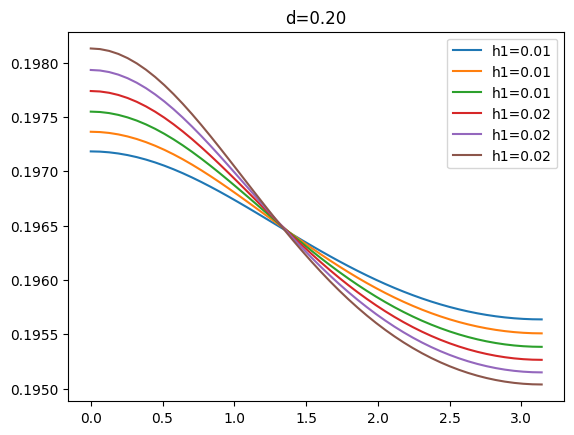

In [51]:
def plot(h):
    sol1=wave1(N,h*Hmx_d*d,d=d,scaler=s)
    Ej1,Q1,R1=unpack1(sol1.x)
    if not sol1.success:
        print(h,'fail')
    plt.plot(X,IEj([d,*Ej1],X),label=f"h1={h:4.2f}")
    return sol1

for h in np.linspace(0.01,0.02,6):
    plot(h)
plt.legend()
plt.title(f'd={d:4.2f}')
plt.show()

0.02 fail step 2
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
0.026000000000000002 fail step 2
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
0.032 fail step 2
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
0.038000000000000006 fail step 2
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
0.044 fail step 2
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
0.05 fail step 2
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


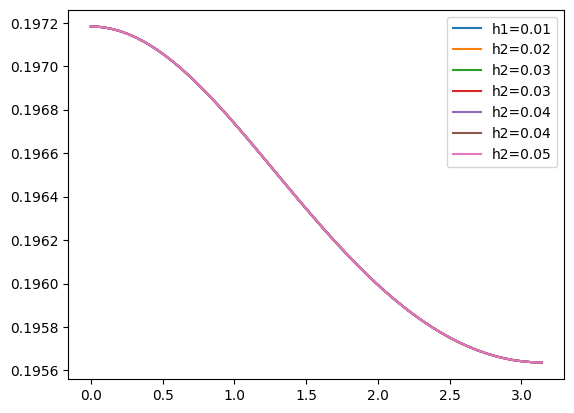

In [52]:
def step(h1,h2,sol1=0):
    if not type(sol1)==OR:
        sol1=wave1(N,h1*Hmx_d*d,d=d,scaler=s)
    sol2=wave1(N,h2*Hmx_d*d,d=d,scaler=s,A0=sol1.x)
    if not sol2.success:
        print(h2,'fail step 2')
        print(sol2.message)
    Ej2,Q2,R2=unpack1(sol2.x)
    plt.plot(X,IEj([d,*Ej2],X),label=f"h2={h2:4.2f}")
    return h2,sol2

h1=0.01
sol1=plot(h1)

for h in np.linspace(0.02,0.05,6):
    h1,sol1=step(h1,h,sol1=sol1)
plt.legend()
plt.show()